<a href="https://colab.research.google.com/github/josegabrielguerrero26/CSE450-machinelearning/blob/main/project3/starter_bikesv3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Title: Neural Network

**Reading Meterial:**

https://byui-cse.github.io/cse450-course/module-04/reading.html#practical

# Case Study

https://byui-cse.github.io/cse450-course/module-04/intro.html

**Introduction**

WelcomeBike Bike Rentals is a Beijing-based bike rental company that has recently expanded to include a handful of US locations. You've been asked to build a neural network that will predict the number of bike rentals for a given day and hour for their Washington DC branch.

<br><br>
**Stakeholders**

These are the individuals your team will be helping during the case study:


*ZHAO, CEO OF WELCOMEBIKE*<br>
Our new DC branch is taking off again after COVID-19. I'm excited to see how machine learning can help us to avoid the mistakes of our competitors and prove to our investors that we have a winning business model.


*WILLIAM, INVESTMENT BANKER*<br>
Oh...it's you again.

Nearly every Chinese bike rental business anyone has invested in has gone bankrupt.

Mr. Zhao seems to think that AI can make all the difference, and our bank's investment board is curious to find out if he's right.

I'm here by their request to witness his failure—I mean, to see how it goes.


*JOHNNY, DATA SCIENCE INTERN*<br>
Hey, small world!

I'm visiting my grandma Peggy in Langley, Virginia and thought I'd stop by the capital and see how you're doing.
<br><br>
**STAKEHOLDER FOCUS AREAS**

The stakeholders are particularly interested in the following areas:

Building a neural network that can predict the number of bicycle rentals for a given day.
Understanding how weather, holidays, and other factors affect revenue.

# Questions


**NETWORK LAYERS AND HYPERPARAMETERS**

ZHAO, CEO OF WELCOMEBIKE
My brother-in-law works for a big AI company in Hong Kong. We've chatted a bit about neural networks, and I was wondering how many layers you think the network should have.

If you run your model on the data and the results seem lower than you expected, which of the following hyperparameters do you feel has the most potential for model improvement?

- Number of neurons and number of hidden layers.
- Learning rate and optimizer selection.
- Batch size and number of epochs.
- Activation functions of the layers and overall loss function.<br><br>

**FEATURE ENGINEERING**

JOHNNY, DATA SCIENCE INTERN<br>
Looking at the features we have, how do you think we should handle the temperature features?<br><br>

**LEARNING RATE**

ZHAO, CEO OF WELCOMEBIKE<br>
My brother-in-law told me that I should be careful with how I handle learning rate in my network.

What approach do you think you're going to take to find the optimal learning rate?<br><br>

**LOSS FUNCTION**

JOHNNY, DATA SCIENCE INTERN<br>

How will we know if our model has strong predictive power?

What are you planning to use for the loss function?<br><br>

**PREDICTIVE RISK MODEL**

WILLIAM, INVESTMENT BANKER

We would like use AI to predict the likelihood of damage based on user profile data, such as name, birthday, sex, or address, so that we can add an insurance premium to the rental cost. We are concerned that there may be ethical/legal implications here, what would you recommend?

Based on your initial analysis of the data, your team feels:

We can do this, as long as the users have provided that profile data and we have kept record of previous damages.
Using any profile data in this way would be inappropriate.
As long as we only use name and address, that would be fine.
Instead of using their profile data, we could track their usage via GPS and feed those live statistics (speed, angle, direction) into the model and deactivate the bike if the model predicts they will damage the bike. (For example, if they were going extremely fast down a crowded sidewalk.)<br><br>

**PANDEMIC AND HEALTH CONCERNS**

ZHAO, CEO OF WELCOMEBIKE
Coming out of the pandemic has put a strain on resources. Our customers are much more concerned about health and safety of sharing bikes.

In your executive summary, would you add your recommendations for when we could pull bikes out of rotation to clean and disinfect them? For example, what days and times we should bring them in?

We also need to know if we have any lasting problems now that we are a few years past COVID-19. What can we expect for forcasts into the future? Are we back on track or still recovering?

# Data Information

- Data:
https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/bikes.csv
- Dictionary:https://byui-cse.github.io/cse450-course/module-04/bikes-dictionary.txt

# Loading Data and Libraries

In [1]:
#pip install scikeras[tensorflow-cpu]

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score



df = pd.read_csv('https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/bikes.csv')
dic= pd.read_csv('https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/bikes_december.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112487 entries, 0 to 112486
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   dteday        112487 non-null  object 
 1   hr            112474 non-null  float64
 2   casual        112487 non-null  int64  
 3   registered    112487 non-null  int64  
 4   temp_c        112487 non-null  float64
 5   feels_like_c  112487 non-null  float64
 6   hum           112487 non-null  float64
 7   windspeed     112487 non-null  float64
 8   weathersit    112487 non-null  int64  
 9   season        112487 non-null  int64  
 10  holiday       112487 non-null  int64  
 11  workingday    112487 non-null  int64  
dtypes: float64(5), int64(6), object(1)
memory usage: 10.3+ MB


In [4]:
pd.set_option('display.max_columns', None)
df.head(5)

,dteday,hr,casual,registered,temp_c,feels_like_c,hum,windspeed,weathersit,season,holiday,workingday
0,1/1/2011,0.0,3,13,3.0,3.0,0.7957,0.8,1,1,0,0
1,1/1/2011,1.0,8,30,1.7,1.7,0.8272,0.8,1,1,0,0
2,1/1/2011,2.0,5,26,1.9,1.9,0.8157,1.1,1,1,0,0
3,1/1/2011,3.0,3,9,2.5,2.5,0.7831,0.8,1,1,0,0
4,1/1/2011,4.0,0,1,2.0,2.0,0.8075,1.1,1,1,0,0


In [5]:
dic.head(5)

,dteday,hr,temp_c,feels_like_c,hum,windspeed,weathersit,season,holiday,workingday
0,11/1/2023,0,6.0,3.8,0.6359,10.8,1,4,0,1
1,11/1/2023,1,6.0,3.4,0.6333,12.7,1,4,0,1
2,11/1/2023,2,5.3,2.6,0.6598,12.0,1,4,0,1
3,11/1/2023,3,5.1,3.8,0.6636,6.3,1,4,0,1
4,11/1/2023,4,4.0,1.8,0.7192,8.4,1,4,0,1


# Cleaning and Transformation Data

In [6]:
from datetime import date
df['dteday']= pd.to_datetime(df['dteday'])

In [7]:
df.isna().sum()

dteday           0
hr              13
casual           0
registered       0
temp_c           0
feels_like_c     0
hum              0
windspeed        0
weathersit       0
season           0
holiday          0
workingday       0
dtype: int64

In [8]:
df.dropna(inplace=True)


In [9]:
df['weathersit'].unique()

array([1, 2, 3, 4])

In [10]:
#df['season'] = df['season'].map({1: 'winter', 2: 'spring', 3: 'summer', 4: 'fall'})

In [11]:
#df = pd.get_dummies(df, columns=['season'], prefix='', prefix_sep='')
df.tail()

,dteday,hr,casual,registered,temp_c,feels_like_c,hum,windspeed,weathersit,season,holiday,workingday
112482,2023-10-31,19.0,241,594,10.2,10.2,0.4516,8.4,2,4,0,1
112483,2023-10-31,20.0,171,450,8.9,7.5,0.5268,9.3,1,4,0,1
112484,2023-10-31,21.0,176,402,7.7,6.4,0.5756,7.8,1,4,0,1
112485,2023-10-31,22.0,106,257,8.0,8.0,0.5604,0.0,1,4,0,1
112486,2023-10-31,23.0,78,135,6.5,6.5,0.6401,4.5,1,4,0,1


In [12]:
df['df_day'] = df['dteday'].dt.day
df['df_month'] = df['dteday'].dt.month
df['df_year'] = df['dteday'].dt.year

In [37]:
df

,dteday,hr,casual,registered,temp_c,feels_like_c,hum,windspeed,weathersit,season,holiday,workingday,df_day,df_month,df_year
0,2011-01-01,0.0,3,13,3.0,3.0,0.7957,0.8,1,1,0,0,1,1,2011
1,2011-01-01,1.0,8,30,1.7,1.7,0.8272,0.8,1,1,0,0,1,1,2011
2,2011-01-01,2.0,5,26,1.9,1.9,0.8157,1.1,1,1,0,0,1,1,2011
3,2011-01-01,3.0,3,9,2.5,2.5,0.7831,0.8,1,1,0,0,1,1,2011
4,2011-01-01,4.0,0,1,2.0,2.0,0.8075,1.1,1,1,0,0,1,1,2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112482,2023-10-31,19.0,241,594,10.2,10.2,0.4516,8.4,2,4,0,1,31,10,2023
112483,2023-10-31,20.0,171,450,8.9,7.5,0.5268,9.3,1,4,0,1,31,10,2023
112484,2023-10-31,21.0,176,402,7.7,6.4,0.5756,7.8,1,4,0,1,31,10,2023
112485,2023-10-31,22.0,106,257,8.0,8.0,0.5604,0.0,1,4,0,1,31,10,2023


# Neuro Network Model

## Split Data

In [13]:
df.columns

Index(['dteday', 'hr', 'casual', 'registered', 'temp_c', 'feels_like_c', 'hum',
       'windspeed', 'weathersit', 'season', 'holiday', 'workingday', 'df_day',
       'df_month', 'df_year'],
      dtype='object')

In [14]:
X=df[['hr', 'temp_c', 'feels_like_c', 'hum',
       'windspeed', 'weathersit', 'season', 'holiday', 'workingday', 'df_day',
       'df_month', 'df_year']]

In [15]:
y=df[['casual','registered']]

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=1)

In [17]:
y_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33743 entries, 84944 to 92789
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   casual      33743 non-null  int64
 1   registered  33743 non-null  int64
dtypes: int64(2)
memory usage: 790.9 KB


In [18]:
df.describe().transpose()[['mean', 'std']]

,mean,std
hr,11.501307,6.921640
casual,90.440351,128.654286
registered,249.208973,258.258870
temp_c,15.377185,9.748639
feels_like_c,14.660352,11.427101
hum,0.636616,0.190325
windspeed,13.099392,7.856017
weathersit,1.405303,0.683237
season,2.496079,1.101165
holiday,0.030300,0.171413


## Normalization selected columns

In [19]:

# fit scaler on training data
#MinMax scales data between 0 and 1
norm = MinMaxScaler().fit(X_train)

# transform training data
X_train = norm.transform(X_train)

# transform testing data
X_test = norm.transform(X_test)
X_train

array([[0.43478261, 0.33514493, 0.32336957, ..., 0.43333333, 0.09090909,
        0.5       ],
       [0.30434783, 0.61050725, 0.58423913, ..., 0.7       , 0.36363636,
        0.25      ],
       [0.43478261, 0.75      , 0.6888587 , ..., 0.8       , 0.63636364,
        0.        ],
       ...,
       [0.52173913, 0.78442029, 0.72554348, ..., 0.13333333, 0.63636364,
        0.        ],
       [0.34782609, 0.21557971, 0.21059783, ..., 0.4       , 0.90909091,
        0.66666667],
       [0.39130435, 0.35326087, 0.37092391, ..., 0.96666667, 0.18181818,
        0.91666667]])

In [40]:
num_columns = X_train.shape[1]
print("Number of columns:", num_columns)

Number of columns: 12


In [20]:
layer = tf.keras.layers.Normalization(axis=None)
layer.adapt(X_train)
normalized_columns = layer(X_train).numpy()


In [21]:
normalized_columns

array([[ 0.00681714, -0.2896211 , -0.3246548 , ...,  0.00250537,
        -1.0162625 ,  0.20084955],
       [-0.38124758,  0.5296266 ,  0.45147467, ...,  0.7958821 ,
        -0.20485446, -0.54294115],
       [ 0.00681714,  0.9446403 ,  0.7627349 , ...,  1.0933985 ,
         0.60655355, -1.286732  ],
       ...,
       [ 0.26552698,  1.0470463 ,  0.8718782 , ..., -0.89004356,
         0.60655355, -1.286732  ],
       [-0.25189263, -0.6453472 , -0.66016906, ..., -0.09666672,
         1.4179617 ,  0.6967101 ],
       [-0.12253773, -0.23572326, -0.18317285, ...,  1.5892588 ,
        -0.74579316,  1.4405009 ]], dtype=float32)

In [22]:
y_train.count()

casual        78731
registered    78731
dtype: int64

## Training Model 1

In [23]:
normalized_columns.shape

(78731, 12)

In [24]:
from tensorflow.keras.optimizers import Adam
lm = Sequential()

# Add layers to the model
lm.add(Dense(64, activation='relu', input_shape=(normalized_columns.shape[1],)))
lm.add(Dense(164, activation='relu'))
lm.add(Dense(2, activation='linear'))  # Output layer

# Compile the model
optimizer = Adam(learning_rate=0.01)
lm.compile(optimizer=optimizer, loss='mean_absolute_error', metrics=['mse'])

# Display model summary
lm.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                832       
                                                                 
 dense_1 (Dense)             (None, 164)               10660     
                                                                 
 dense_2 (Dense)             (None, 2)                 330       
                                                                 
Total params: 11822 (46.18 KB)
Trainable params: 11822 (46.18 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [25]:
early_stop = keras.callbacks.EarlyStopping(monitor='val_mse', patience=10)

In [28]:
%%time
history = lm.fit(
    normalized_columns,
    y_train,
    epochs=10,
    batch_size=20,
    # Suppress logging.
    verbose=0,
    # Calculate validation results on 20% of the training data.
   validation_split=.35,
   callbacks=[early_stop],
   shuffle=False)

CPU times: user 1min 2s, sys: 3.47 s, total: 1min 5s
Wall time: 1min 22s


In [29]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.head(10)

,loss,mse,val_loss,val_mse,epoch
0,28.946993,2853.684326,29.997351,2976.655273,0
1,28.834759,2809.505371,29.685993,2863.214600,1
2,28.844440,2810.690430,29.612274,2815.878662,2
3,28.777304,2812.250244,29.269697,2810.950439,3
4,28.730120,2784.914551,29.811310,2821.969482,4
5,28.638529,2771.401123,29.725000,2865.229004,5
6,28.767376,2807.466797,29.738764,2879.401611,6
7,28.619101,2769.908936,29.781094,2845.812988,7
8,28.551695,2752.451904,29.382277,2809.870850,8
9,28.735308,2835.206543,29.318155,2803.329102,9


In [30]:
def plot_loss(hist):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim()
  plt.xlabel('Epoch')
  plt.ylabel('Error [#]')
  plt.legend()
  plt.grid(True)

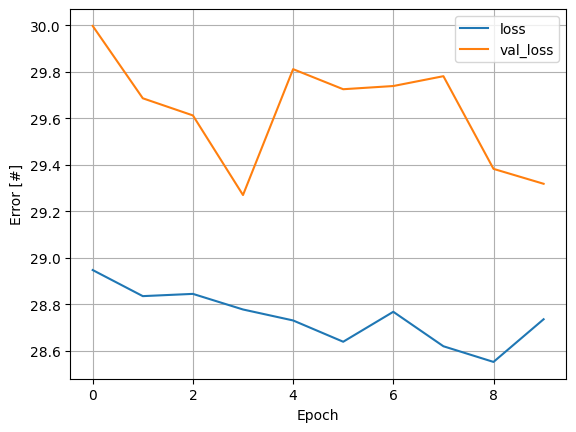

In [31]:
plot_loss(history)

In [32]:
predictions = np.round(lm.predict(X_test),0)

1055/1055 [==============================] - 1s 1ms/step


In [33]:
y_test= y_test[['casual', 'registered']].sum(axis=1)

In [34]:
import numpy as np
import pandas as pd

# Assuming 'predictions' is your NumPy array with two columns


# Sum the two columns along axis 1 to get a single column
sum_column = np.sum(predictions, axis=1)

# Convert the summed column to a pandas DataFrame
predictions_df = pd.DataFrame({'sum': sum_column})

# Now 'predictions_df' contains a DataFrame with the summed column
predictions_df


,sum
0,162.0
1,286.0
2,203.0
3,312.0
4,430.0
...,...
33738,233.0
33739,178.0
33740,404.0
33741,181.0


In [35]:
# View the RMSE
result = mean_squared_error(y_test, predictions_df, squared=False)
result

383.72667580249265

In [36]:

# View r2 score
r2 = r2_score(y_test,predictions_df)
r2

-0.25345126329162615

## Hyperparameters

In [ ]:
'''# Define a function to create the model
def create_model(learning_rate=0.001, num_neurons=64):
    model = Sequential()
    model.add(Dense(num_neurons, activation='relu', input_shape=(X_train_norm_df_selected.shape[1],)))
    model.add(Dense(num_neurons, activation='relu'))
    model.add(Dense(1, activation='linear'))
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='mean_absolute_error', metrics=['accuracy'])
    return model


# Compile the model


optimizer = Adam(learning_rate=0.1)
lm.compile(optimizer='adam', loss='mean_absolute_error', metrics=['accuracy'])

# Create a KerasRegressor based on the create_model function

keras_model = KerasRegressor(build_fn=create_model, verbose=0)

# Define hyperparameters grid
param_grid = {
    'learning_rate': [0.1],
    'num_neurons': [32, 64, 128],
    'epochs': [100, 150, 200]
}

# Perform grid search
grid = GridSearchCV(estimator=keras_model, param_grid=param_grid, cv=3)
grid_result = grid.fit(X_train_norm_df_selected, y_train)

# Print results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
'''

## Predictions

In [ ]:
#miniholdout
df_use=pd.read_csv('https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/biking_holdout_test_mini.csv')
#holdout dataset
df_use1=pd.read_csv('https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/bikes_december.csv')

df_use1.info()

In [ ]:
#df_use['season'] = df_use['season'].map({1: 'winter', 2: 'spring', 3: 'summer', 4: 'fall'})

In [ ]:
#df_use = pd.get_dummies(df_use, columns=['season'], prefix='', prefix_sep='')

In [ ]:
df_use['dteday']= pd.to_datetime(df_use['dteday'])

In [ ]:
df_use.columns

In [ ]:
df_use['df_day'] = df_use['dteday'].dt.day
df_use['df_month'] = df_use['dteday'].dt.month
df_use['df_year'] = df_use['dteday'].dt.year

In [ ]:
df_use.columns

In [ ]:
X_use= df_use[['dteday', 'hr', 'temp_c', 'feels_like_c', 'hum', 'windspeed',
       'weathersit', 'season', 'holiday', 'workingday', 'df_day', 'df_month',
       'df_year']]

In [ ]:
selected_columns = ['temp_c', 'feels_like_c','windspeed','weathersit']
# Select only the specified columns from the DataFrame

df_selected = X_use[selected_columns]

X_train_tf_selected = tf.constant(df_selected.values, dtype=tf.float32)

layer = tf.keras.layers.Normalization(axis=None)
layer.adapt(X_train_tf_selected)
normalized_columns=layer(X_train_tf_selected)


X_train_norm_df_selected_use = pd.DataFrame(tf.concat(normalized_columns, axis=0).numpy(), columns=selected_columns)

In [ ]:
X_train_norm_df_selected_use

In [ ]:
X_use.drop(columns= ['temp_c', 'feels_like_c','windspeed','weathersit'], inplace=True)

In [ ]:
X_use.reset_index(drop=True, inplace=True)
X_train_norm_df_selected_use.reset_index(drop=True, inplace=True)

In [ ]:
concatenated_df_use = pd.concat([X_use, X_train_norm_df_selected_use], axis=1)

In [ ]:
concatenated_df_use

In [ ]:
concatenated_df_use.drop(columns=["dteday"], inplace=True)

In [ ]:
X_train_norm_df_selected_use=concatenated_df_use

In [ ]:
X_train_norm_df_selected_use

In [ ]:
print(X_train_norm_df_selected_use.shape)

In [ ]:
#Reshape in case is needed
#X_train_norm_df_selected_use = X_train_norm_df_selected_use.reshape(-1, 13)

In [ ]:
predictions_use = lm.predict(X_train_norm_df_selected_use)

In [ ]:
predictions = predictions_use.reshape(-1)
# Create a DataFrame with predictions
predictions_df1 = pd.DataFrame({'predictions': predictions})

# Save predictions to a CSV file
predictions_df1.to_csv('team8-module3-predictions.csv', index=False)